<a href="https://colab.research.google.com/github/Gaukhar-ai/Gaukhar/blob/master/HousePricing1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#!pip install category_encoders

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import scipy
import missingno as msno
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from category_encoders import LeaveOneOutEncoder
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor, plot_tree
from scipy import stats
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, classification_report

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/Gaukhar-ai/Gaukhar/master/Housing_Prices.csv?_sm_au_=iVVbcrwnP1jVSFsML321jK0f1JH33")
df.head()

#overall picture of data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.info()

#checking what data types, how many rows of data and non-null values I have. 
# I have 1460 rows of data and 81 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
df = df.replace([np.inf, -np.inf], np.nan)
#replacing any irrelevant values to null values

In [6]:
null_counts = df.isnull().sum()
null_counts[null_counts>0]

#let's see how many rows of null values I have for a column that have null values.

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [7]:
null_counts.dtypes

dtype('int64')

In [8]:
for col in df.columns:
  print('-' * 79 + col + '-'*79, end=' - ')
  display(df[col].value_counts().head(30))

#I want to see how many unique values in each column. 
#From here I will select columns that have same values for the most part and drop them. But I'll also take into consideration 
#how valuable can be those variables. 

-------------------------------------------------------------------------------Id------------------------------------------------------------------------------- - 

1460    1
479     1
481     1
482     1
483     1
484     1
485     1
486     1
487     1
488     1
489     1
490     1
491     1
492     1
493     1
494     1
495     1
496     1
497     1
498     1
499     1
480     1
478     1
501     1
477     1
458     1
459     1
460     1
461     1
462     1
Name: Id, dtype: int64

-------------------------------------------------------------------------------MSSubClass------------------------------------------------------------------------------- - 

20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64

-------------------------------------------------------------------------------MSZoning------------------------------------------------------------------------------- - 

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

-------------------------------------------------------------------------------LotFrontage------------------------------------------------------------------------------- - 

60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
65.0      44
85.0      40
78.0      25
21.0      23
90.0      23
68.0      19
24.0      19
64.0      19
73.0      18
72.0      17
79.0      17
63.0      17
55.0      17
100.0     16
51.0      15
66.0      15
74.0      15
52.0      14
59.0      13
71.0      12
82.0      12
40.0      12
43.0      12
67.0      12
57.0      12
Name: LotFrontage, dtype: int64

-------------------------------------------------------------------------------LotArea------------------------------------------------------------------------------- - 

7200     25
9600     24
6000     17
10800    14
9000     14
8400     14
1680     10
7500      9
8125      8
9100      8
6120      8
6240      8
3182      7
7800      6
8450      6
10000     5
4500      5
4435      5
5000      5
10140     5
9750      5
10400     5
5400      5
7018      4
11700     4
9375      4
8800      4
9900      4
8750      4
6600      4
Name: LotArea, dtype: int64

-------------------------------------------------------------------------------Street------------------------------------------------------------------------------- - 

Pave    1454
Grvl       6
Name: Street, dtype: int64

-------------------------------------------------------------------------------Alley------------------------------------------------------------------------------- - 

Grvl    50
Pave    41
Name: Alley, dtype: int64

-------------------------------------------------------------------------------LotShape------------------------------------------------------------------------------- - 

Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

-------------------------------------------------------------------------------LandContour------------------------------------------------------------------------------- - 

Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64

-------------------------------------------------------------------------------Utilities------------------------------------------------------------------------------- - 

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

-------------------------------------------------------------------------------LotConfig------------------------------------------------------------------------------- - 

Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64

-------------------------------------------------------------------------------LandSlope------------------------------------------------------------------------------- - 

Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64

-------------------------------------------------------------------------------Neighborhood------------------------------------------------------------------------------- - 

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
Blmngtn     17
MeadowV     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

-------------------------------------------------------------------------------Condition1------------------------------------------------------------------------------- - 

Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64

-------------------------------------------------------------------------------Condition2------------------------------------------------------------------------------- - 

Norm      1445
Feedr        6
PosN         2
RRNn         2
Artery       2
RRAn         1
PosA         1
RRAe         1
Name: Condition2, dtype: int64

-------------------------------------------------------------------------------BldgType------------------------------------------------------------------------------- - 

1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: BldgType, dtype: int64

-------------------------------------------------------------------------------HouseStyle------------------------------------------------------------------------------- - 

1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64

-------------------------------------------------------------------------------OverallQual------------------------------------------------------------------------------- - 

5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: OverallQual, dtype: int64

-------------------------------------------------------------------------------OverallCond------------------------------------------------------------------------------- - 

5    821
6    252
7    205
8     72
4     57
3     25
9     22
2      5
1      1
Name: OverallCond, dtype: int64

-------------------------------------------------------------------------------YearBuilt------------------------------------------------------------------------------- - 

2006    67
2005    64
2004    54
2007    49
2003    45
1976    33
1977    32
1920    30
1959    26
1999    25
1998    25
1958    24
1965    24
1970    24
1954    24
2000    24
2002    23
2008    23
1972    23
1968    22
1971    22
1950    20
2001    20
1957    20
1962    19
1994    19
1966    18
2009    18
1995    18
1940    18
Name: YearBuilt, dtype: int64

-------------------------------------------------------------------------------YearRemodAdd------------------------------------------------------------------------------- - 

1950    178
2006     97
2007     76
2005     73
2004     62
2000     55
2003     51
2002     48
2008     40
1996     36
1998     36
1995     31
1976     30
1999     30
1970     26
1997     25
1977     25
2009     23
1994     22
2001     21
1972     20
1965     19
1993     19
1971     18
1959     18
1968     17
1992     17
1978     16
1966     15
1958     15
Name: YearRemodAdd, dtype: int64

-------------------------------------------------------------------------------RoofStyle------------------------------------------------------------------------------- - 

Gable      1141
Hip         286
Flat         13
Gambrel      11
Mansard       7
Shed          2
Name: RoofStyle, dtype: int64

-------------------------------------------------------------------------------RoofMatl------------------------------------------------------------------------------- - 

CompShg    1434
Tar&Grv      11
WdShngl       6
WdShake       5
Roll          1
Metal         1
Membran       1
ClyTile       1
Name: RoofMatl, dtype: int64

-------------------------------------------------------------------------------Exterior1st------------------------------------------------------------------------------- - 

VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
BrkComm      2
Stone        2
ImStucc      1
AsphShn      1
CBlock       1
Name: Exterior1st, dtype: int64

-------------------------------------------------------------------------------Exterior2nd------------------------------------------------------------------------------- - 

VinylSd    504
MetalSd    214
HdBoard    207
Wd Sdng    197
Plywood    142
CmentBd     60
Wd Shng     38
Stucco      26
BrkFace     25
AsbShng     20
ImStucc     10
Brk Cmn      7
Stone        5
AsphShn      3
Other        1
CBlock       1
Name: Exterior2nd, dtype: int64

-------------------------------------------------------------------------------MasVnrType------------------------------------------------------------------------------- - 

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

-------------------------------------------------------------------------------MasVnrArea------------------------------------------------------------------------------- - 

0.0      861
72.0       8
180.0      8
108.0      8
120.0      7
16.0       7
80.0       6
200.0      6
106.0      6
340.0      6
170.0      5
132.0      5
360.0      5
84.0       5
320.0      5
100.0      4
196.0      4
246.0      4
216.0      4
160.0      4
183.0      4
178.0      4
270.0      4
300.0      4
210.0      4
268.0      4
252.0      4
168.0      4
336.0      4
220.0      4
Name: MasVnrArea, dtype: int64

-------------------------------------------------------------------------------ExterQual------------------------------------------------------------------------------- - 

TA    906
Gd    488
Ex     52
Fa     14
Name: ExterQual, dtype: int64

-------------------------------------------------------------------------------ExterCond------------------------------------------------------------------------------- - 

TA    1282
Gd     146
Fa      28
Ex       3
Po       1
Name: ExterCond, dtype: int64

-------------------------------------------------------------------------------Foundation------------------------------------------------------------------------------- - 

PConc     647
CBlock    634
BrkTil    146
Slab       24
Stone       6
Wood        3
Name: Foundation, dtype: int64

-------------------------------------------------------------------------------BsmtQual------------------------------------------------------------------------------- - 

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

-------------------------------------------------------------------------------BsmtCond------------------------------------------------------------------------------- - 

TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64

-------------------------------------------------------------------------------BsmtExposure------------------------------------------------------------------------------- - 

No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

-------------------------------------------------------------------------------BsmtFinType1------------------------------------------------------------------------------- - 

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64

-------------------------------------------------------------------------------BsmtFinSF1------------------------------------------------------------------------------- - 

0       467
24       12
16        9
20        5
686       5
616       5
936       5
662       5
428       4
655       4
442       4
1200      4
400       4
300       4
312       4
495       4
384       4
697       4
641       4
360       4
560       4
588       4
547       4
504       4
600       4
553       4
674       3
1036      3
403       3
672       3
Name: BsmtFinSF1, dtype: int64

-------------------------------------------------------------------------------BsmtFinType2------------------------------------------------------------------------------- - 

Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

-------------------------------------------------------------------------------BsmtFinSF2------------------------------------------------------------------------------- - 

0      1293
180       5
374       3
551       2
93        2
468       2
147       2
480       2
539       2
712       2
117       2
279       2
96        2
391       2
287       2
290       2
294       2
64        2
41        2
182       2
469       2
228       1
208       1
210       1
211       1
202       1
215       1
193       1
219       1
184       1
Name: BsmtFinSF2, dtype: int64

-------------------------------------------------------------------------------BsmtUnfSF------------------------------------------------------------------------------- - 

0      118
728      9
384      8
572      7
600      7
300      7
440      6
625      6
280      6
672      6
270      6
162      5
108      5
490      5
390      5
80       5
326      5
816      5
698      5
319      5
264      5
216      5
410      5
638      4
768      4
780      4
660      4
420      4
840      4
556      4
Name: BsmtUnfSF, dtype: int64

-------------------------------------------------------------------------------TotalBsmtSF------------------------------------------------------------------------------- - 

0       37
864     35
672     17
912     15
1040    14
816     13
728     12
768     12
848     11
780     11
894     11
832     10
630      9
756      9
952      9
1056     8
936      8
1008     7
483      7
840      7
384      7
720      7
600      7
1362     6
876      6
858      6
884      6
1392     6
796      6
793      5
Name: TotalBsmtSF, dtype: int64

-------------------------------------------------------------------------------Heating------------------------------------------------------------------------------- - 

GasA     1428
GasW       18
Grav        7
Wall        4
OthW        2
Floor       1
Name: Heating, dtype: int64

-------------------------------------------------------------------------------HeatingQC------------------------------------------------------------------------------- - 

Ex    741
TA    428
Gd    241
Fa     49
Po      1
Name: HeatingQC, dtype: int64

-------------------------------------------------------------------------------CentralAir------------------------------------------------------------------------------- - 

Y    1365
N      95
Name: CentralAir, dtype: int64

-------------------------------------------------------------------------------Electrical------------------------------------------------------------------------------- - 

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

-------------------------------------------------------------------------------1stFlrSF------------------------------------------------------------------------------- - 

864     25
1040    16
912     14
848     12
894     12
672     11
816      9
630      9
936      7
960      7
483      7
832      7
764      6
990      6
728      6
1056     6
840      6
882      6
1728     6
720      6
796      5
1494     5
1422     5
520      5
1072     5
1080     5
616      5
798      5
1236     5
958      5
Name: 1stFlrSF, dtype: int64

-------------------------------------------------------------------------------2ndFlrSF------------------------------------------------------------------------------- - 

0       829
728      10
504       9
672       8
546       8
720       7
600       7
896       6
780       5
862       5
689       5
840       5
756       5
702       4
739       4
551       4
741       4
878       4
804       4
670       3
660       3
1254      3
793       3
668       3
795       3
742       3
832       3
684       3
846       3
807       3
Name: 2ndFlrSF, dtype: int64

-------------------------------------------------------------------------------LowQualFinSF------------------------------------------------------------------------------- - 

0      1434
80        3
360       2
528       1
53        1
120       1
144       1
156       1
205       1
232       1
234       1
371       1
572       1
390       1
392       1
397       1
420       1
473       1
479       1
481       1
513       1
514       1
515       1
384       1
Name: LowQualFinSF, dtype: int64

-------------------------------------------------------------------------------GrLivArea------------------------------------------------------------------------------- - 

864     22
1040    14
894     11
848     10
1456    10
912      9
1200     9
816      8
1092     8
1344     7
1728     7
987      7
1056     6
1224     6
1768     6
1494     6
1484     6
630      6
1144     5
1314     5
960      5
1252     5
1710     5
1392     5
988      5
990      5
1656     5
1218     5
1302     5
882      4
Name: GrLivArea, dtype: int64

-------------------------------------------------------------------------------BsmtFullBath------------------------------------------------------------------------------- - 

0    856
1    588
2     15
3      1
Name: BsmtFullBath, dtype: int64

-------------------------------------------------------------------------------BsmtHalfBath------------------------------------------------------------------------------- - 

0    1378
1      80
2       2
Name: BsmtHalfBath, dtype: int64

-------------------------------------------------------------------------------FullBath------------------------------------------------------------------------------- - 

2    768
1    650
3     33
0      9
Name: FullBath, dtype: int64

-------------------------------------------------------------------------------HalfBath------------------------------------------------------------------------------- - 

0    913
1    535
2     12
Name: HalfBath, dtype: int64

-------------------------------------------------------------------------------BedroomAbvGr------------------------------------------------------------------------------- - 

3    804
2    358
4    213
1     50
5     21
6      7
0      6
8      1
Name: BedroomAbvGr, dtype: int64

-------------------------------------------------------------------------------KitchenAbvGr------------------------------------------------------------------------------- - 

1    1392
2      65
3       2
0       1
Name: KitchenAbvGr, dtype: int64

-------------------------------------------------------------------------------KitchenQual------------------------------------------------------------------------------- - 

TA    735
Gd    586
Ex    100
Fa     39
Name: KitchenQual, dtype: int64

-------------------------------------------------------------------------------TotRmsAbvGrd------------------------------------------------------------------------------- - 

6     402
7     329
5     275
8     187
4      97
9      75
10     47
11     18
3      17
12     11
14      1
2       1
Name: TotRmsAbvGrd, dtype: int64

-------------------------------------------------------------------------------Functional------------------------------------------------------------------------------- - 

Typ     1360
Min2      34
Min1      31
Mod       15
Maj1      14
Maj2       5
Sev        1
Name: Functional, dtype: int64

-------------------------------------------------------------------------------Fireplaces------------------------------------------------------------------------------- - 

0    690
1    650
2    115
3      5
Name: Fireplaces, dtype: int64

-------------------------------------------------------------------------------FireplaceQu------------------------------------------------------------------------------- - 

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

-------------------------------------------------------------------------------GarageType------------------------------------------------------------------------------- - 

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

-------------------------------------------------------------------------------GarageYrBlt------------------------------------------------------------------------------- - 

2005.0    65
2006.0    59
2004.0    53
2003.0    50
2007.0    49
1977.0    35
1998.0    31
1999.0    30
2008.0    29
1976.0    29
2000.0    27
2002.0    26
1968.0    26
1950.0    24
1993.0    22
2009.0    21
1965.0    21
1966.0    21
1962.0    21
1958.0    21
2001.0    20
1996.0    20
1957.0    20
1970.0    20
1960.0    19
1997.0    19
1978.0    19
1954.0    19
1974.0    18
1994.0    18
Name: GarageYrBlt, dtype: int64

-------------------------------------------------------------------------------GarageFinish------------------------------------------------------------------------------- - 

Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64

-------------------------------------------------------------------------------GarageCars------------------------------------------------------------------------------- - 

2    824
1    369
3    181
0     81
4      5
Name: GarageCars, dtype: int64

-------------------------------------------------------------------------------GarageArea------------------------------------------------------------------------------- - 

0      81
440    49
576    47
240    38
484    34
528    33
288    27
400    25
480    24
264    24
308    20
420    19
280    16
672    15
216    12
504    12
336    12
352    12
360    11
564    11
300    10
462    10
572    10
540    10
539     9
660     9
180     9
384     9
312     9
286     9
Name: GarageArea, dtype: int64

-------------------------------------------------------------------------------GarageQual------------------------------------------------------------------------------- - 

TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64

-------------------------------------------------------------------------------GarageCond------------------------------------------------------------------------------- - 

TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

-------------------------------------------------------------------------------PavedDrive------------------------------------------------------------------------------- - 

Y    1340
N      90
P      30
Name: PavedDrive, dtype: int64

-------------------------------------------------------------------------------WoodDeckSF------------------------------------------------------------------------------- - 

0      761
192     38
100     36
144     33
120     31
168     28
140     15
224     14
240     10
208     10
216      9
180      8
160      8
250      6
132      6
264      6
143      6
96       6
156      6
171      5
48       5
196      5
105      5
288      5
210      5
220      4
158      4
104      4
147      4
74       4
Name: WoodDeckSF, dtype: int64

-------------------------------------------------------------------------------OpenPorchSF------------------------------------------------------------------------------- - 

0      656
36      29
48      22
20      21
40      19
45      19
30      16
24      16
60      15
39      14
28      14
44      13
50      13
54      13
72      12
98      11
63      11
35      11
32      11
75      10
42      10
120     10
96      10
64       9
66       9
16       8
78       8
56       8
38       8
84       8
Name: OpenPorchSF, dtype: int64

-------------------------------------------------------------------------------EnclosedPorch------------------------------------------------------------------------------- - 

0      1252
112      15
96        6
120       5
144       5
192       5
216       5
252       4
116       4
156       4
126       3
228       3
128       3
184       3
102       3
150       3
40        3
176       3
164       3
77        2
185       2
80        2
180       2
84        2
160       2
168       2
205       2
158       2
154       2
100       2
Name: EnclosedPorch, dtype: int64

-------------------------------------------------------------------------------3SsnPorch------------------------------------------------------------------------------- - 

0      1436
168       3
216       2
144       2
180       2
245       1
238       1
290       1
196       1
182       1
407       1
304       1
162       1
153       1
320       1
140       1
130       1
96        1
23        1
508       1
Name: 3SsnPorch, dtype: int64

-------------------------------------------------------------------------------ScreenPorch------------------------------------------------------------------------------- - 

0      1344
192       6
224       5
120       5
189       4
180       4
160       3
168       3
144       3
126       3
147       3
90        3
200       2
198       2
216       2
184       2
259       2
100       2
176       2
170       2
288       2
142       2
153       1
154       1
152       1
155       1
145       1
156       1
143       1
322       1
Name: ScreenPorch, dtype: int64

-------------------------------------------------------------------------------PoolArea------------------------------------------------------------------------------- - 

0      1453
738       1
648       1
576       1
555       1
519       1
512       1
480       1
Name: PoolArea, dtype: int64

-------------------------------------------------------------------------------PoolQC------------------------------------------------------------------------------- - 

Gd    3
Ex    2
Fa    2
Name: PoolQC, dtype: int64

-------------------------------------------------------------------------------Fence------------------------------------------------------------------------------- - 

MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64

-------------------------------------------------------------------------------MiscFeature------------------------------------------------------------------------------- - 

Shed    49
Othr     2
Gar2     2
TenC     1
Name: MiscFeature, dtype: int64

-------------------------------------------------------------------------------MiscVal------------------------------------------------------------------------------- - 

0        1408
400        11
500         8
700         5
450         4
2000        4
600         4
1200        2
480         2
1150        1
800         1
15500       1
620         1
3500        1
560         1
2500        1
1300        1
1400        1
350         1
8300        1
54          1
Name: MiscVal, dtype: int64

-------------------------------------------------------------------------------MoSold------------------------------------------------------------------------------- - 

6     253
7     234
5     204
4     141
8     122
3     106
10     89
11     79
9      63
12     59
1      58
2      52
Name: MoSold, dtype: int64

-------------------------------------------------------------------------------YrSold------------------------------------------------------------------------------- - 

2009    338
2007    329
2006    314
2008    304
2010    175
Name: YrSold, dtype: int64

-------------------------------------------------------------------------------SaleType------------------------------------------------------------------------------- - 

WD       1267
New       122
COD        43
ConLD       9
ConLI       5
ConLw       5
CWD         4
Oth         3
Con         2
Name: SaleType, dtype: int64

-------------------------------------------------------------------------------SaleCondition------------------------------------------------------------------------------- - 

Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64

-------------------------------------------------------------------------------SalePrice------------------------------------------------------------------------------- - 

140000    20
135000    17
145000    14
155000    14
190000    13
110000    13
160000    12
115000    12
139000    11
130000    11
125000    10
143000    10
185000    10
180000    10
144000    10
175000     9
147000     9
100000     9
127000     9
165000     8
176000     8
170000     8
129000     8
230000     8
250000     8
200000     8
141000     8
215000     8
148000     7
173000     7
Name: SalePrice, dtype: int64

In [9]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [10]:
#features like Fence, Pool, Alley Fireplace, MiscFeatures can affect the price. These are so-called extras
# I can combine them altogether into one columns

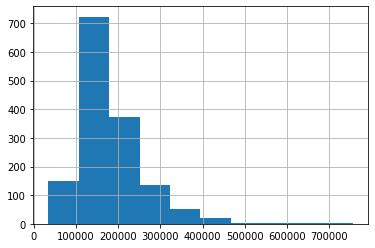

In [11]:
df['SalePrice'].hist()
#the price ranges from 90 K to 350-ish. The ones that cost more than 400 K must be real outliers, 
#some extra luxurious houses in the area. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f18c96057d0>,
      dtype=object)

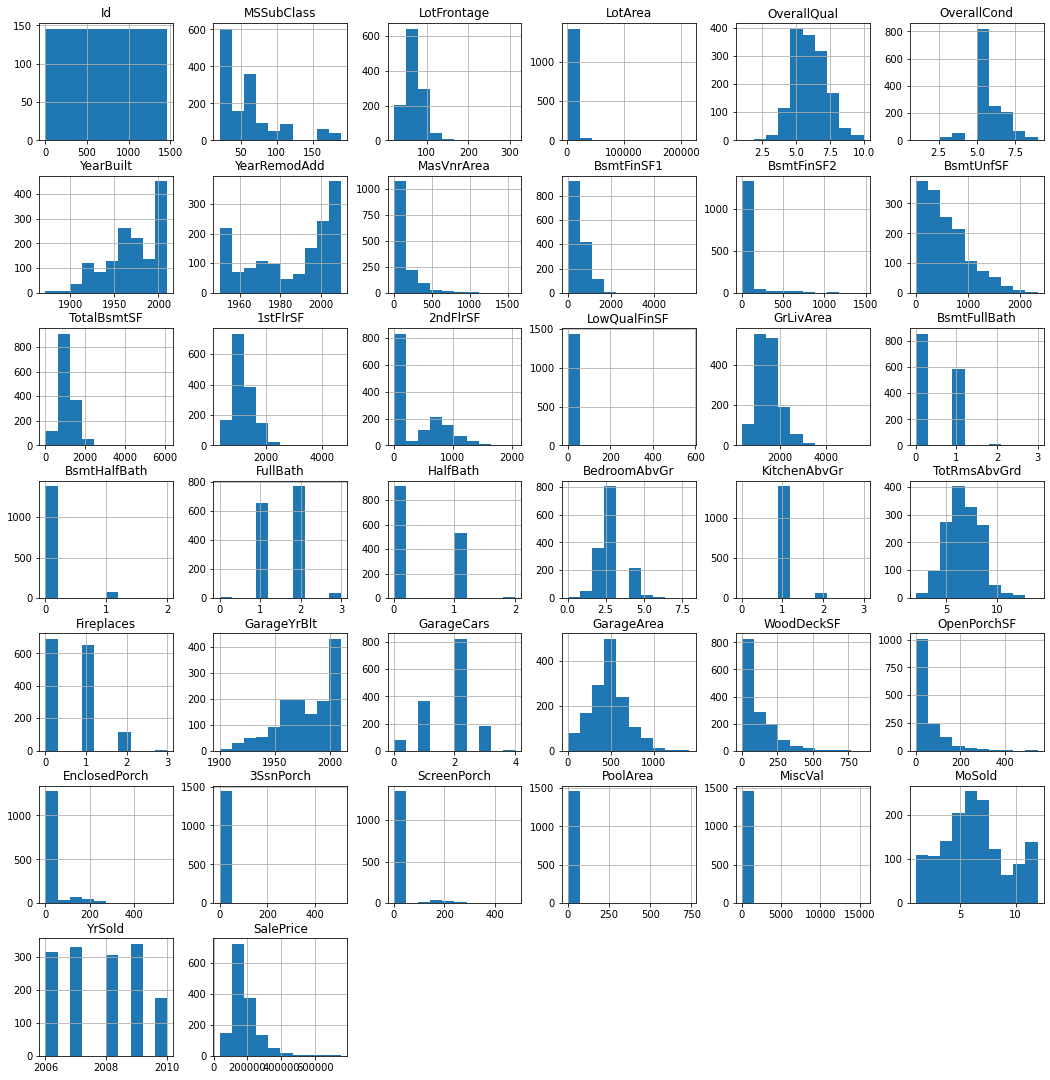

In [12]:
df.hist(figsize=(18, 19))
#looking at each numerical variable given below we can see the overall picture. OverallCond is mostly in the ranges between 5 and 6. 
# We can also observe that the data is skewed to the right, meaning there're some extreme outliers that are causing the skew, like BsmtHalfBath or 2 of HalfBath, 2-3 Fireplaces, etc. It might be 
#those pricey houses that cost over $500,000

In [13]:
drop_cols = ['Fence', 'PoolQC', 'Alley', 'Id']
df.drop(columns= drop_cols, inplace =True)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,0,12,2008,WD,Normal,250000


In [14]:
df = df.dropna()
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
51,50,RM,52.0,6240,Pave,Reg,Lvl,AllPub,Inside,Gtl,BrkSide,Norm,Norm,1Fam,1.5Fin,6,6,1934,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,PConc,TA,TA,No,Unf,0,Unf,0,816,816,GasA,TA,Y,SBrkr,816,0,360,1176,0,0,1,0,3,1,TA,6,Typ,1,Gd,Detchd,1985.0,Unf,2,528,TA,TA,Y,112,0,0,0,0,0,Shed,400,9,2006,WD,Normal,114500
510,20,RL,75.0,14559,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1951,2000,Hip,CompShg,Wd Sdng,Wd Sdng,BrkCmn,70.0,Gd,TA,CBlock,TA,TA,No,BLQ,650,Rec,180,178,1008,GasA,Ex,Y,SBrkr,1363,0,0,1363,1,0,1,0,2,1,TA,6,Min1,2,TA,CarPort,1951.0,Unf,1,288,TA,TA,Y,324,42,0,0,168,0,Shed,2000,6,2009,WD,Normal,164900
733,20,RL,80.0,10000,Pave,Reg,Lvl,AllPub,Corner,Gtl,Sawyer,Feedr,Norm,1Fam,1Story,5,6,1961,1983,Hip,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,TA,TA,No,BLQ,594,Unf,0,270,864,GasA,Ex,Y,SBrkr,1144,0,0,1144,1,0,1,0,3,1,TA,6,Typ,1,TA,Attchd,1961.0,RFn,1,264,TA,TA,Y,165,0,0,0,0,0,Shed,400,3,2009,WD,Normal,131400
766,60,RL,80.0,10421,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,2Story,7,5,1988,1988,Gable,CompShg,HdBoard,HdBoard,BrkFace,42.0,TA,TA,CBlock,Gd,TA,No,GLQ,394,Unf,0,586,980,GasA,TA,Y,SBrkr,980,734,0,1714,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1988.0,Unf,2,496,TA,TA,Y,228,66,156,0,0,0,Shed,500,3,2010,WD,Normal,196500
873,40,RL,60.0,12144,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1949,1950,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,CBlock,TA,TA,No,Rec,375,Unf,0,457,832,GasA,Gd,Y,SBrkr,1036,0,232,1268,0,0,1,0,3,1,TA,6,Typ,1,Gd,Attchd,1949.0,Unf,1,288,TA,TA,Y,0,28,0,0,0,0,Othr,0,9,2009,WD,Normal,133000


In [15]:
X = df.drop(columns=['SalePrice'])
y = df['SalePrice']
#defining X and y sets for training.
#dropping the Saleprice from the training data and for the y predictor defining it as a predictor. 

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 55)

In [17]:

# num_cols = ['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', '1stFlrSF', 'HalfBath', 'BedroomAbvGr', 'WoodDeckSF', 'MoSold', 'YrSold', 'SalePrice']

# bin_cols = []

# cat_cols = ['BldgType', 'Neighborhood', 'Exterior1st', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'GarageFinish', 'KitchenQual']
# drop_cats = []

In [18]:
encoder = LeaveOneOutEncoder()
encoder.fit(X_train, y_train)

#encoding categorical columns with "LeaveOneOutEncoder" for ML to learn from numerical data. 

LeaveOneOutEncoder(cols=['MSZoning', 'Street', 'LotShape', 'LandContour',
                         'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
                         'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
                         'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
                         'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
                         'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
                         'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir',
                         'Electrical', 'KitchenQual', ...],
                   drop_invariant=False, handle_missing='value',
                   handle_unknown='value', random_state=None, return_df=True,
                   sigma=None, verbose=0)

In [19]:
X_train = encoder.transform(X_train)
X_test = encoder.transform(X_test)

In [20]:
X_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1076,50,177037.5,60.0,10800,178680.0,170755.555556,178680.0,178680.0,175987.5,178680.0,213000.0,176737.5,178680.0,178680.0,165850.000000,5,8,1936,1989,185557.142857,178680.0,159600.0,178880.0,169233.333333,0.0,168128.571429,175987.5,175328.571429,178680.0,178680.0,184877.777778,166500.000000,626,171487.5,0,170,796,170088.888889,178680.0,178680.0,178680.0,1096,370,0,1466,0,1,2,0,3,1,203000.000000,7,167450.000000,1,198485.714286,188083.333333,1950.0,170800.0,2,566,170088.888889,178680.0,178680.0,436,21,0,0,0,0,170755.555556,500,4,2006,178680.0,178680.0
51,50,185250.0,52.0,6240,178680.0,170755.555556,178680.0,178680.0,175987.5,178680.0,178680.0,176737.5,178680.0,178680.0,165850.000000,6,6,1934,1950,185557.142857,178680.0,159600.0,178880.0,169233.333333,0.0,168128.571429,175987.5,151750.000000,145060.0,178680.0,184877.777778,142133.333333,0,171487.5,0,816,816,170088.888889,180250.0,178680.0,178680.0,816,0,360,1176,0,0,1,0,3,1,168257.142857,6,170842.857143,1,137250.000000,164466.666667,1985.0,170800.0,2,528,170088.888889,178680.0,178680.0,112,0,0,0,0,0,170755.555556,400,9,2006,178680.0,178680.0
510,20,177037.5,75.0,14559,178680.0,170755.555556,178680.0,178680.0,175987.5,178680.0,152700.0,176737.5,178680.0,178680.0,162633.333333,5,7,1951,2000,162633.333333,178680.0,159600.0,178880.0,178680.000000,70.0,203300.000000,175987.5,175328.571429,145060.0,178680.0,184877.777778,191633.333333,650,178680.0,180,178,1008,170088.888889,179160.0,178680.0,178680.0,1363,0,0,1363,1,0,1,0,2,1,168257.142857,6,167450.000000,2,198485.714286,178680.000000,1951.0,170800.0,1,288,170088.888889,178680.0,178680.0,324,42,0,0,168,0,170755.555556,2000,6,2009,178680.0,178680.0
766,60,177037.5,80.0,10421,178680.0,170755.555556,178680.0,178680.0,175987.5,178680.0,223250.0,176737.5,178680.0,178680.0,211833.333333,7,5,1988,1988,185557.142857,178680.0,178250.0,178250.0,202166.666667,42.0,168128.571429,175987.5,175328.571429,222875.0,178680.0,184877.777778,178680.000000,394,171487.5,0,586,980,170088.888889,180250.0,178680.0,178680.0,980,734,0,1714,0,0,2,1,3,1,168257.142857,7,170842.857143,1,198485.714286,188083.333333,1988.0,170800.0,2,496,170088.888889,178680.0,178680.0,228,66,156,0,0,0,170755.555556,500,3,2010,178680.0,178680.0
1210,60,177037.5,70.0,11218,178680.0,170755.555556,178680.0,178680.0,175987.5,178680.0,178680.0,176737.5,178680.0,178680.0,211833.333333,6,5,1992,1992,185557.142857,178680.0,159600.0,178880.0,169233.333333,0.0,203300.000000,175987.5,151750.000000,222875.0,178680.0,184877.777778,142133.333333,0,171487.5,0,1055,1055,170088.888889,179160.0,178680.0,178680.0,1055,790,0,1845,0,0,2,1,3,1,203000.000000,8,170842.857143,1,198485.714286,188083.333333,1992.0,190500.0,2,462,170088.888889,178680.0,178680.0,635,104,0,0,0,0,170755.555556,400,5,2010,178680.0,178680.0


Bootstrapping. Bootstrapping is repeatedly sampling with replacement. 

In [21]:
X_sample = X_train.sample(n=3)
X_sample.index

#I'm sampling my training data

Int64Index([890, 1076, 51], dtype='int64')

In [22]:
y_sample = y_train.loc[X_sample.index] #to get the same index numbers for y_sampling I used X_sample.index
y_sample

890     122900
1076    170000
51      114500
Name: SalePrice, dtype: int64

In [23]:
#random forest concept where iterations happen over and over
def xy_sample(X, y, size, random_state = None):
  X_sample = X.sample(n=size, random_state=random_state)
  y_sample = y.loc[X_sample.index]

  return X_sample, y_sample

In [24]:
#I want it to repeat it for a few times. 

n_samples = 5 
sample_size = 3

bootstrap_samples = []

for i in range(n_samples): # for loop to iterate and make samples
#the number os samples is stored in n_samples
  X_sample, y_sample = xy_sample(X = X_train, y = y_train, size = sample_size)

  train_sample = {"X": X_sample, 'y': y_sample} #storing in a dictionary to have X, y labels

  bootstrap_samples.append(train_sample) #storing all samples together in a list

bootstrap_samples
#5 times picks up the rows of X and matching rows of y

[{'X':       MSSubClass  MSZoning  LotFrontage  ...  YrSold  SaleType  SaleCondition
  1328          50  185250.0         60.0  ...    2008  178680.0       178680.0
  51            50  185250.0         52.0  ...    2006  178680.0       178680.0
  1210          60  177037.5         70.0  ...    2010  178680.0       178680.0
  
  [3 rows x 76 columns], 'y': 1328    256000
  51      114500
  1210    189000
  Name: SalePrice, dtype: int64},
 {'X':       MSSubClass  MSZoning  LotFrontage  ...  YrSold  SaleType  SaleCondition
  1210          60  177037.5         70.0  ...    2010  178680.0       178680.0
  51            50  185250.0         52.0  ...    2006  178680.0       178680.0
  510           20  177037.5         75.0  ...    2009  178680.0       178680.0
  
  [3 rows x 76 columns],
  'y': 1210    189000
  51      114500
  510     164900
  Name: SalePrice, dtype: int64},
 {'X':       MSSubClass  MSZoning  LotFrontage  ...  YrSold  SaleType  SaleCondition
  766           60  177037.5   

In [25]:
#Bagging = Bootstrap Aggregating. Building models on bootstrap samples
#aggregating the predictions of each model

In [26]:
#creating a sample size of 10. Fitting the decision tree to the sample

X_sample, y_sample = xy_sample(X_train, y_train, size=10, random_state=55)
tree_1 = RandomForestRegressor()
tree_1.fit(X_sample, y_sample)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [27]:
#changing the random state so it sees the new data
X_sample, y_sample = xy_sample(X_train, y_train, size=10, random_state=1111)
tree_2 = RandomForestRegressor()
tree_2.fit(X_sample, y_sample)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

I have two different models which learnt only from 10 random rows of data each. 

In [28]:
X_sample, y_sample = xy_sample(X_train, y_train, size=10, random_state=452562)
tree_3 = RandomForestRegressor()
tree_3.fit(X_sample, y_sample)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [29]:
pred_1 = tree_1.predict(X_test)
pred_2 = tree_2.predict(X_test)
pred_3 = tree_3.predict(X_test)
pred_df = pd.DataFrame({'pred_1': pred_1, 'pred_2': pred_2, 'pred_3': pred_3})
pred_df

#for the most part they agree with each other, but they also have disagreements. 
#using only 3 trees, on the everage all three are pretty smart.

,pred_1,pred_2,pred_3
0,188190.0,188591.0,199413.0
1,159348.0,163421.0,159611.0
2,164273.0,161273.0,158937.0


In [30]:
pred_df.mean(axis='rows')

pred_1    170603.666667
pred_2    171095.000000
pred_3    172653.666667
dtype: float64

In [31]:
pred_df['avg_vote'] = pred_df.mean(axis='columns')
pred_df

,pred_1,pred_2,pred_3,avg_vote
0,188190.0,188591.0,199413.0,192064.666667
1,159348.0,163421.0,159611.0,160793.333333
2,164273.0,161273.0,158937.0,161494.333333


In [32]:
pred_df['final_prediction'] = pred_df['avg_vote'] > 0.5
pred_df['final_prediction'] = pred_df['final_prediction'].astype(int)
pred_df 
#if prediction is more than 50% then it's good. 1 = good, 0 = bad prediction

,pred_1,pred_2,pred_3,avg_vote,final_prediction
0,188190.0,188591.0,199413.0,192064.666667,1
1,159348.0,163421.0,159611.0,160793.333333,1
2,164273.0,161273.0,158937.0,161494.333333,1


In [33]:
df.drop_duplicates(inplace=True)

In [34]:
confusion_matrix(y_test, pred_df['final_prediction'])
#naive predictions

array([[0, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0]])

In [35]:
pred_df

,pred_1,pred_2,pred_3,avg_vote,final_prediction
0,188190.0,188591.0,199413.0,192064.666667,1
1,159348.0,163421.0,159611.0,160793.333333,1
2,164273.0,161273.0,158937.0,161494.333333,1


In [36]:
#what percentage of the predictions are correct?
# pd.DataFrame(
#     confusion_matrix(y_test, pred_df['final_prediction']),
#     index = ['Benign', 'Malignant'],
#     columns = ['Predicted Benign', 'Predicted Malignant'],
# )

Random subspace. X component referred as 'feature space'. A subspace is a subset of a space. So, we'll be taking samples of our columns

In [37]:
X_train.sample(2, axis="columns")
#randomness to prevent overfitting.

,BsmtFinSF2,3SsnPorch
1076,0,0
51,0,0
510,180,0
766,0,0
1210,0,0
1386,469,0
890,0,0
1171,0,0
1083,0,0
1328,0,0


Random Forest

In [38]:
model = RandomForestRegressor(max_depth=3, n_estimators=1000, random_state=55)
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=3, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=55, verbose=0, warm_start=False)

In [39]:
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

print(f"train_score: {train_score}")
print(f"test_score: {test_score}")

#overfitting, I need to experiment more with different variables and I need more data

train_score: 0.9209903139882347
test_score: 0.4335683838804122


In [40]:
y_pred = model.predict(X_test)
print(y_test, y_pred)
#ok predictions, just need to refine the data

1457    266500
873     133000
733     131400
Name: SalePrice, dtype: int64 [195437.51642857 161547.91619048 162170.50095238]


In [41]:
importance_df = pd.DataFrame({'feat': X_train.columns, "importance": model.feature_importances_})
importance_df.sort_values("importance", ascending=False)
#important features that affect the house price

,feat,importance
44,GrLivArea,0.088798
41,1stFlrSF,0.088745
42,2ndFlrSF,0.075677
36,TotalBsmtSF,0.057979
21,Exterior1st,0.054682
...,...,...
62,GarageCond,0.000000
29,BsmtCond,0.000000
39,CentralAir,0.000000
40,Electrical,0.000000
